In [1]:
import pandas as pd
from scipy.stats import chisquare, ttest_ind, shapiro
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [3]:
plt.style.use('ggplot')

In [4]:
data = pd.read_excel('Výsledky dotazníků.xlsx', sheet_name='body')
data.head()

,povolani,Dotatník,č. 1,č. 2,č. 3,č. 4,č. 5,č. 5a - předmět,č. 6/A,č. 6/B,...,č. 32/1,č. 32/2,č. 32/3,č. 32/4,č. 32/5,BODY,Pohlaví,věk,ročník,Unnamed: 54
0,Sociální činnost,1,a,a,-,Dospívání,a,př,X,NaN,...,1,1,0,1,0,33,M,16,1,NaN
1,Sociální činnost,2,a,a,-,těhotenství,a,př,NaN,X,...,1,0,0,1,0,22,Ž,16,1,NaN
2,Sociální činnost,3,a,n,Nezájem,-,a,vkz,NaN,X,...,1,1,1,0,0,39,M,16,1,NaN
3,Sociální činnost,4,a,n,-,-,a,-,X,NaN,...,0,1,1,1,0,29,Ž,17,1,NaN
4,Sociální činnost,5,a,a,-,Sex,a,-,NaN,X,...,1,1,0,1,1,25,Ž,16,1,NaN


In [7]:
# 1. chceme zjistit jestli zalezi na pohlavi podle poctu bodu - body na pohlavi
# 2. existuje zavislost mezi sebehodnocenim znalosti (ot. c. 9) a body
# 3. existuje zavislost mezi obor studia (povolani) a body

In [24]:
data['č. 9'].describe()

count     201
unique      2
top         a
freq      164
Name: č. 9, dtype: object

In [25]:
data['č. 9'].unique()

array(['n', 'a'], dtype=object)

In [38]:
c = 'č. 9'
data_c9_ano = data[data[c] == 'a']
data_c9_ne = data[data[c] == 'n']

c9_ano = data_c9_ano[c]
c9_ne = data_c9_ne[c]

c9_ano_body = data_c9_ano['BODY']
c9_ne_body = data_c9_ne['BODY']

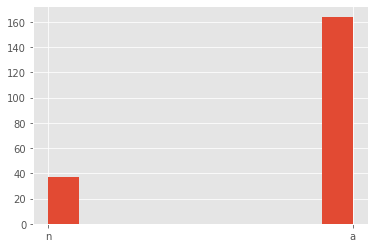

In [33]:
data[c].hist()
plt.show()

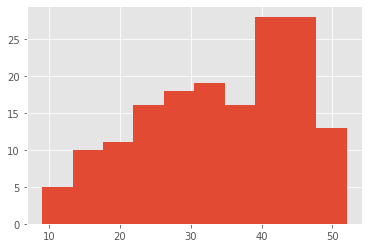

In [39]:
c9_ano_body.hist()
plt.show()

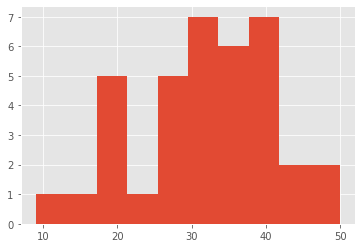

In [40]:
c9_ne_body.hist()
plt.show()

In [44]:
display(c9_ano_body.mean(), c9_ne_body.mean())

34.146341463414636

32.027027027027025

In [43]:
ttest_ind(c9_ano_body, c9_ne_body, equal_var=False)

Ttest_indResult(statistic=1.2354356668066182, pvalue=0.22129801284273207)